# Лабораторная работа 2
## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.
Цель лабораторной работы: изучение способов предварительной обработки данных для дальнейшего формирования моделей.
Для лабораторный работы был взят датасет melb_data из библиотеки sklearn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, Normalizer
from sklearn.impute import MissingIndicator, SimpleImputer
%matplotlib inline

In [ ]:
data = pd.read_csv('melb_data.csv')
data.shape

(13580, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
data.isnull().sum()

## Обработка пропусков в данных
Посмотрим % пропусков в столбах.

In [ ]:
num_cols = []
for column in data.columns:
    temp_null_count = data[data[column].isnull()].shape[0]
    dt = str(data[column].dtype)

    if temp_null_count > 0 and (dt == 'float64' or dt == 'int64'):
        num_cols.append(column)
        temp_percent = round((temp_null_count/ data.shape[0]) * 100.0, 2)
        print('Столбец: {}. Тип данных: {}. Кол-во пустых значений: {}, {}%'.format(column, dt, temp_null_count, temp_percent))

Столбец: Car. Тип данных: float64. Кол-во пустых значений: 62, 0.46%
Столбец: BuildingArea. Тип данных: float64. Кол-во пустых значений: 6450, 47.5%
Столбец: YearBuilt. Тип данных: float64. Кол-во пустых значений: 5375, 39.58%


In [ ]:
def impute_dataframe(df, col, strategy_name) -> pd.DataFrame:
    """
    Функия для заполнения пропусков в столбце датафрейма

    :param df: Датафрейм
    :param col: Столбец, в которой надо заполнить пропуски
    :param strategy_name: Стратегия импьютации
    :return: Датафрейм с заполнненой колонкой
    """
    imp = SimpleImputer(strategy=strategy_name)

    data_imputed = imp.fit_transform(df[[col]])
    df[[col]] = data_imputed

    return df

In [ ]:
data_comp = impute_dataframe(data, 'Car', 'most_frequent')
data_comp = impute_dataframe(data_comp, 'BuildingArea', 'median')
data_comp = impute_dataframe(data_comp, 'YearBuilt', 'median')

data_comp.isnull().sum()

## Кодирование категориальных признаков

Закодируем колонку 'Type' с помощью one-hot encoding

In [ ]:
one = OneHotEncoder(dtype=np.int64)
data_tmp = data_comp[['Type']]
data_enc = one.fit_transform(data_tmp)
data_enc

<13580x3 sparse matrix of type '<class 'numpy.int64'>'
	with 13580 stored elements in Compressed Sparse Row format>

In [ ]:
data_enc.todense()[0:10]

In [ ]:
data_enc.shape

(13580, 3)

## Масштабирование данных

Для масштабирования используем поле Salary.

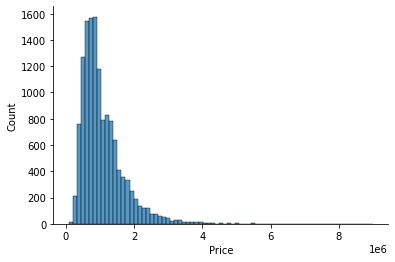

In [ ]:
sns.histplot(data_comp['Price'], bins= 75)
sns.despine()
plt.show()

## MinMax масштабирование

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform(data_comp[['Price']])

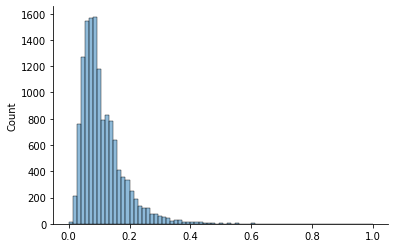

In [ ]:
sns.histplot(minmax_scaled_data, bins= 75, legend=False)
sns.despine()
plt.show()

## Масштабированние на основе Z-оценки

In [ ]:
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(data_comp[['Price']])

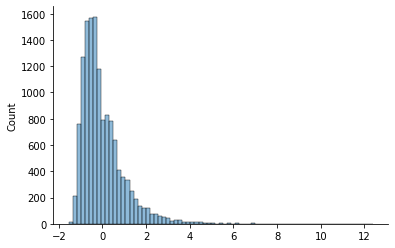

In [ ]:
sns.histplot(standard_scaled_data, bins= 75, legend=False)
sns.despine()
plt.show()